# Model selection and  assessment

We discussed during class why it is appropriate to hold-out part of the data as a test dataset

$$ \hat{L} = \frac{1}{n_T} \sum_{(x,y)\in T} \ell(y, \hat{f}(x)), \quad \textit{TRAINING ERROR} $$

$$ \hat{L}_{HO} = \frac{1}{n_{HO}} \sum_{(x,y)\in HO} \ell(y, \hat{f}(x)), \quad \textit{HOLD-OUT ERROR} $$

with $\hat{f}$ being the solution of the training set $T$.

In actual applications, there are often two steps to solving a prediction problem: model selection and model assessment. In model selection we estimate the performance of various competing models with the hope of choosing the best one. Having chosen the final model, we assess the model by estimating the prediction error on new unseen data.

Class of models $\hat{f}_{\alpha}$: one should not use the test dataset for selecting $\alpha$. 

One could divide the data in three parts: 
- train;
- validation;
- (hold-out) test.

We use the training and validation data to select the best model and the test data to assess the chosen model.
The recipe is the following:

1.  We train all competing model on the train data and define the best model as the one that predicts best in the validation set.  We could re-split the train/validation data, do this many times, and select the method that, on average, performs the best.

2.  We chose the best model among many competitors, hence the observed performance will be a bit biased. Therefore, to appropriately assess performance on independent data we look at the score on the test set.


A common problem: when the amout of data is limited, the results from fitting a model to splitted data can be substantially different to fitting to the complete dataset. Indeed, when the number of samples is small (smaller than the number of variables) we do not have enough examples to approach the problem as described above. Thus, we need to perform a cross-validation procedure that returns a mean error score on the data.

## Exercise #1: Splitting Techniques

Given the California-housing dataset, use the following splitting methods:
- **K-fold** : split dataset into k consecutive folds. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
- **Monte Carlo** : randomly split the dataset into training and test sets(we need to specify the percentage of the test data points and an initial random state for reshuffling the data. We set `test_size = 0.2` and `random_state = 1`).
- **Leave One Out** : provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

**Compute the mean and standard deviation at different splits for each feature and plot them. Use 5 splits for K-fold and MC. Comment on the results**

When performing data-splitting, you can refer to the classes in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
target = cal_housing.target

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
#TODO
# (K-Fold)
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [128]:
def utility_func(df,column,cv):
    
    it =1
    Test_Mean = []
    Train_Mean = []
    Train_Std = []
    Test_Std= []
    print(column)
    for train_index, test_index in cv.split(df):
        print("Iteration: ", str(it), "TRAIN Mean:", df.iloc[train_index][column].mean(), "TEST Mean:", df.iloc[test_index][column].mean())
        print("Iteration: ", str(it), "TRAIN Std:", df.iloc[train_index][column].std(), "TEST Std:", df.iloc[test_index][column].std()) 
        Train_Mean.append(df.iloc[train_index][column].mean())
        Test_Mean.append(df.iloc[test_index][column].mean())
        Train_Std.append(df.iloc[train_index][column].std())
        Test_Std.append(df.iloc[test_index][column].std())
        it = it+1
    return  Train_Mean,Test_Mean,Train_Std,Test_Std

def plot_d(list_1,list_2,title,xlabel,ylabel):
    plt.plot(list_1)
    plt.plot(list_2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Train','Test'])
    

In [129]:
a = utility_func(df,"MedInc",kf)

MedInc
Iteration:  1 TRAIN Mean: 3.9323571826550388 TEST Mean: 3.6239262839147286
Iteration:  1 TRAIN Std: 1.9140820313961735 TEST Std: 1.8211220717613654
Iteration:  2 TRAIN Mean: 3.9404850472383717 TEST Mean: 3.591414825581395
Iteration:  2 TRAIN Std: 1.8904013287671548 TEST Std: 1.911946899654332
Iteration:  3 TRAIN Mean: 3.7387253936531004 TEST Mean: 4.39845343992248
Iteration:  3 TRAIN Std: 1.8484660898925231 TEST Std: 2.0079946475783874
Iteration:  4 TRAIN Mean: 3.9413360646802325 TEST Mean: 3.5880107558139533
Iteration:  4 TRAIN Std: 1.963072751414841 TEST Std: 1.5914760523749263
Iteration:  5 TRAIN Mean: 3.8004513263081394 TEST Mean: 4.1515497093023255
Iteration:  5 TRAIN Std: 1.8716322600774675 TEST Std: 1.9841611383715547


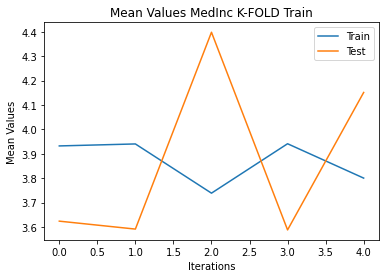

In [130]:
plot_d(a[0],a[1],"Mean Values MedInc K-FOLD Train","Iterations","Mean Values")

[1.8211220717613654,
 1.911946899654332,
 2.0079946475783874,
 1.5914760523749263,
 1.9841611383715547]

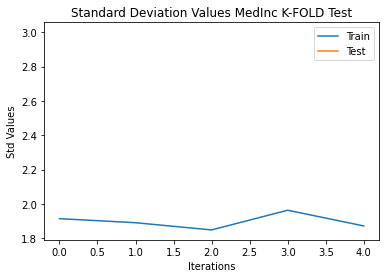

In [131]:
plot_d(a[2],[3],"Standard Deviation Values MedInc K-FOLD Test","Iterations","Std Values")
a[2] 
a[3]

In [132]:
#Iteration Plots KFOLD
HouseAge = utility_func(df,"HouseAge",kf)

HouseAge
Iteration:  1 TRAIN Mean: 28.522771317829456 TEST Mean: 29.106346899224807
Iteration:  1 TRAIN Std: 12.547098448863148 TEST Std: 12.729067240988138
Iteration:  2 TRAIN Mean: 26.8484132751938 TEST Mean: 35.803779069767444
Iteration:  2 TRAIN Std: 12.59113607083273 TEST Std: 9.679790435507165
Iteration:  3 TRAIN Mean: 29.624878875968992 TEST Mean: 24.697916666666668
Iteration:  3 TRAIN Std: 12.677282596030123 TEST Std: 11.390318306469227
Iteration:  4 TRAIN Mean: 28.92405523255814 TEST Mean: 27.501211240310077
Iteration:  4 TRAIN Std: 12.126977354253121 TEST Std: 14.218073745012324
Iteration:  5 TRAIN Mean: 29.277313468992247 TEST Mean: 26.088178294573645
Iteration:  5 TRAIN Std: 12.789323073029019 TEST Std: 11.384654024168062


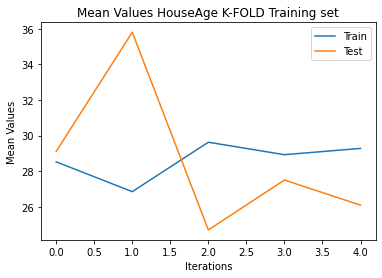

In [133]:
#House age TRAINING SET
plot_d(HouseAge[0],HouseAge[1],"Mean Values HouseAge K-FOLD Training set","Iterations","Mean Values")

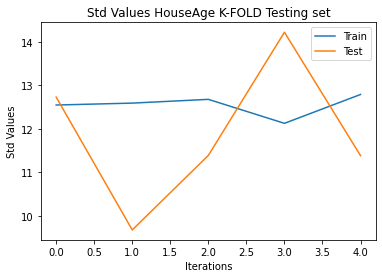

In [134]:
plot_d(HouseAge[2],HouseAge[3],"Std Values HouseAge K-FOLD Testing set","Iterations","Std Values")

In [135]:
AveRooms = utility_func(df,"AveRooms",kf)

AveRooms
Iteration:  1 TRAIN Mean: 5.373039100299663 TEST Mean: 5.652842309753225
Iteration:  1 TRAIN Std: 1.990115165691581 TEST Std: 3.834819060697032
Iteration:  2 TRAIN Mean: 5.61816253331057 TEST Mean: 4.672348577709596
Iteration:  2 TRAIN Std: 2.6660406651532536 TEST Std: 1.208930948834807
Iteration:  3 TRAIN Mean: 5.3388806346924484 TEST Mean: 5.789476172182085
Iteration:  3 TRAIN Std: 2.421214749819859 TEST Std: 2.6453248337536244
Iteration:  4 TRAIN Mean: 5.42040707649649 TEST Mean: 5.46337040496592
Iteration:  4 TRAIN Std: 2.5633130032170484 TEST Std: 2.0796752740250857
Iteration:  5 TRAIN Mean: 5.394509366152706 TEST Mean: 5.566961246341054
Iteration:  5 TRAIN Std: 2.656792577932274 TEST Std: 1.5331278743686936


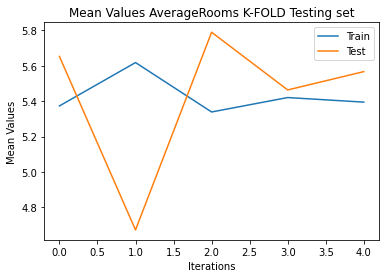

In [136]:
plot_d(AveRooms[0],AveRooms[1],"Mean Values AverageRooms K-FOLD Testing set","Iterations","Mean Values")

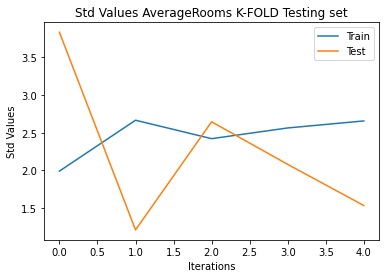

In [137]:
plot_d(AveRooms[2],AveRooms[3],"Std Values AverageRooms K-FOLD Testing set","Iterations","Std Values")

In [138]:
AveBedrms = utility_func(df,"AveBedrms",kf)

AveBedrms
Iteration:  1 TRAIN Mean: 1.0884964073612604 TEST Mean: 1.1293901185859971
Iteration:  1 TRAIN Std: 0.3405898351782151 TEST Std: 0.811016000664647
Iteration:  2 TRAIN Mean: 1.109013143791978 TEST Mean: 1.0473231728631278
Iteration:  2 TRAIN Std: 0.5275867914769331 TEST Std: 0.0808473533172089
Iteration:  3 TRAIN Mean: 1.0893319656327087 TEST Mean: 1.1260478855002045
Iteration:  3 TRAIN Std: 0.47021793282410296 TEST Std: 0.4873562657125063
Iteration:  4 TRAIN Mean: 1.0948729838583762 TEST Mean: 1.1038838125975343
Iteration:  4 TRAIN Std: 0.49370420245896257 TEST Std: 0.38465266005642673
Iteration:  5 TRAIN Mean: 1.1016612473867162 TEST Mean: 1.0767307584841754
Iteration:  5 TRAIN Std: 0.5132951721478002 TEST Std: 0.2619133045553311


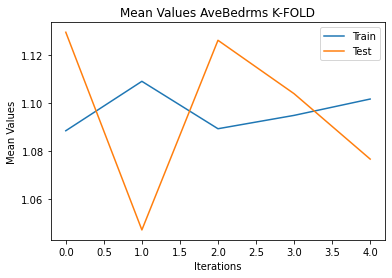

In [139]:
plot_d(AveBedrms[0],AveBedrms[1],"Mean Values AveBedrms K-FOLD","Iterations","Mean Values")

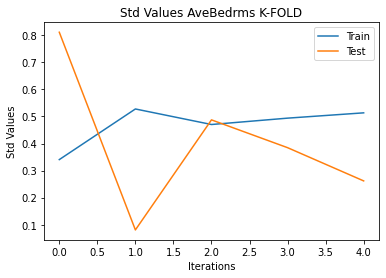

In [140]:
plot_d(AveBedrms[2],AveBedrms[3],"Std Values AveBedrms K-FOLD","Iterations","Std Values")

In [141]:
Population = utility_func(df,"Population",kf)

Population
Iteration:  1 TRAIN Mean: 1458.764898255814 TEST Mean: 1292.3241279069769
Iteration:  1 TRAIN Std: 1170.4143977564631 TEST Std: 954.438400887988
Iteration:  2 TRAIN Mean: 1412.9998183139535 TEST Mean: 1475.3844476744187
Iteration:  2 TRAIN Std: 1157.5062623242845 TEST Std: 1024.8044355189209
Iteration:  3 TRAIN Mean: 1406.4212088178294 TEST Mean: 1501.6988856589148
Iteration:  3 TRAIN Std: 1076.1320166901307 TEST Std: 1331.6339497718018
Iteration:  4 TRAIN Mean: 1411.5832122093022 TEST Mean: 1481.0508720930231
Iteration:  4 TRAIN Std: 1093.423684961203 TEST Std: 1275.3678856852944
Iteration:  5 TRAIN Mean: 1437.6145833333333 TEST Mean: 1376.9253875968993
Iteration:  5 TRAIN Std: 1160.6621011580082 TEST Std: 1010.5061708628609


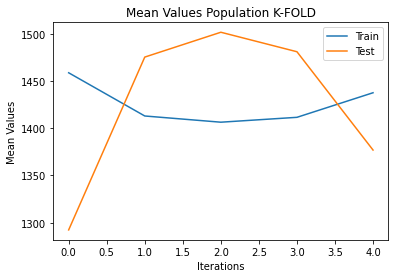

In [142]:
plot_d(Population[0],Population[1],"Mean Values Population K-FOLD","Iterations","Mean Values")

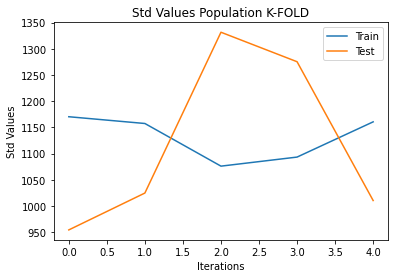

In [143]:
plot_d(Population[2],Population[3],"Std Values Population K-FOLD","Iterations","Std Values")

In [144]:
AveOccup = utility_func(df,"AveOccup",kf)

AveOccup
Iteration:  1 TRAIN Mean: 3.088484637378052 TEST Mean: 2.9993372476696654
Iteration:  1 TRAIN Std: 10.63511130353188 TEST Std: 9.324362189456497
Iteration:  2 TRAIN Mean: 3.028588291435601 TEST Mean: 3.238922631439469
Iteration:  2 TRAIN Std: 11.601270007685919 TEST Std: 0.9816201448346162
Iteration:  3 TRAIN Mean: 3.1153855178886145 TEST Mean: 2.8917337256274123
Iteration:  3 TRAIN Std: 11.574726214346565 TEST Std: 1.849355541617559
Iteration:  4 TRAIN Mean: 3.112912887600935 TEST Mean: 2.9016242467781317
Iteration:  4 TRAIN Std: 11.459899191253994 TEST Std: 3.7425033473634484
Iteration:  5 TRAIN Mean: 3.0079044628786695 TEST Mean: 3.3216579456671935
Iteration:  5 TRAIN Std: 5.133051124690576 TEST Std: 20.831800151762035


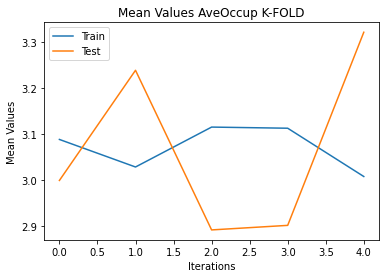

In [145]:
plot_d(AveOccup[0],AveOccup[1],"Mean Values AveOccup K-FOLD","Iterations","Mean Values")

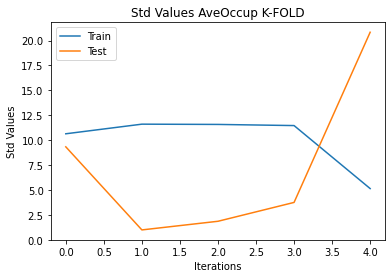

In [146]:
plot_d(AveOccup[2],AveOccup[3],"Std Values AveOccup K-FOLD","Iterations","Std Values")

In [147]:
#Monte Carlo split
from sklearn.model_selection import ShuffleSplit
Mc = ShuffleSplit(n_splits=5, test_size=.2, random_state=1)
Mc.get_n_splits(df)

5

In [148]:
aMc = utility_func(df,"MedInc",Mc)

MedInc
Iteration:  1 TRAIN Mean: 3.8761492732558143 TEST Mean: 3.848757921511628
Iteration:  1 TRAIN Std: 1.8915836238166426 TEST Std: 1.932499746392949
Iteration:  2 TRAIN Mean: 3.8817297722868216 TEST Mean: 3.826435925387597
Iteration:  2 TRAIN Std: 1.909832788947366 TEST Std: 1.8588082182156918
Iteration:  3 TRAIN Mean: 3.867737457606589 TEST Mean: 3.8824051841085274
Iteration:  3 TRAIN Std: 1.883528635650232 TEST Std: 1.9638328675209054
Iteration:  4 TRAIN Mean: 3.8657175145348837 TEST Mean: 3.8904849563953485
Iteration:  4 TRAIN Std: 1.8859534607407133 TEST Std: 1.9544187994933144
Iteration:  5 TRAIN Mean: 3.880594513081395 TEST Mean: 3.830976962209302
Iteration:  5 TRAIN Std: 1.904522456526416 TEST Std: 1.880606608382752


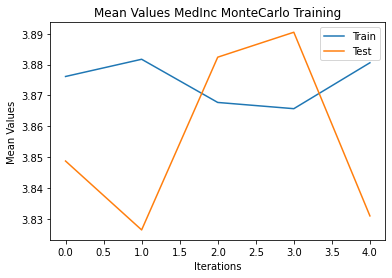

In [149]:
plot_d(aMc[0],aMc[1],"Mean Values MedInc MonteCarlo Training","Iterations","Mean Values")

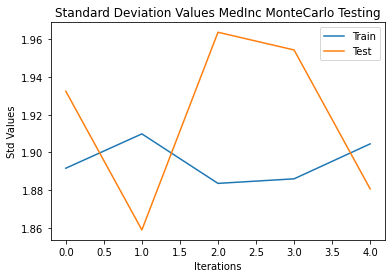

In [151]:
plot_d(aMc[2],aMc[3],"Standard Deviation Values MedInc MonteCarlo Testing","Iterations","Std Values")

In [154]:
#MonteCarlo Split
HouseAgeMc = utility_func(df,"HouseAge",Mc)

HouseAge
Iteration:  1 TRAIN Mean: 28.604469476744185 TEST Mean: 28.779554263565892
Iteration:  1 TRAIN Std: 12.58604637649294 TEST Std: 12.58415234837359
Iteration:  2 TRAIN Mean: 28.6547359496124 TEST Mean: 28.578488372093023
Iteration:  2 TRAIN Std: 12.603211229520364 TEST Std: 12.516028683924715
Iteration:  3 TRAIN Mean: 28.64983042635659 TEST Mean: 28.598110465116278
Iteration:  3 TRAIN Std: 12.581867622131135 TEST Std: 12.601747422701171
Iteration:  4 TRAIN Mean: 28.71547965116279 TEST Mean: 28.33551356589147
Iteration:  4 TRAIN Std: 12.566550654361201 TEST Std: 12.658266914442006
Iteration:  5 TRAIN Mean: 28.643410852713178 TEST Mean: 28.623788759689923
Iteration:  5 TRAIN Std: 12.611617590767459 TEST Std: 12.48227960275551


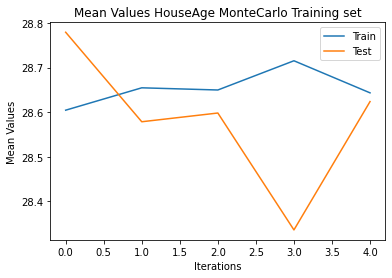

In [156]:
plot_d(HouseAgeMc[0],HouseAgeMc[1],"Mean Values HouseAge MonteCarlo Training set","Iterations","Mean Values")

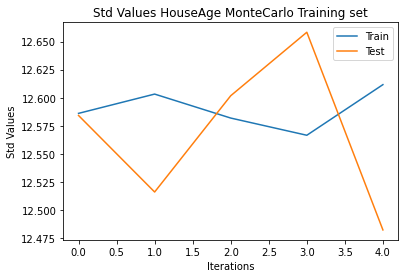

In [157]:
plot_d(HouseAgeMc[2],HouseAgeMc[3],"Std Values HouseAge MonteCarlo Training set","Iterations","Std Values")

In [158]:
# I will stop the plots here pretty much, its the same process as above. Just use the two utility functions. 

In [159]:
# Leave one Out 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(df)

20640

In [69]:
len(df)

20640

In [70]:
h = [1,2,3,4]
len(h)

4

### Imputation Using (Mean/Median) Values:
Many real-world datasets may contain missing values for various reasons.
Training a model with a dataset that has a lot of missing values can drastically impact the model’s quality.
One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values.


One strategy of imputing is to compute the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others.

**Among the previous strategies of splitting, which one would you suggest to use for imputing missing data? Motivate your answer.**

In [17]:
# TODO
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Excercise #2: Cross-validation


Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`.

When evaluating different settings for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a validation set: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called **cross-validation**. A test set should still be held out for final evaluation, but a fixed validation set is no longer needed when doing CV and the model sees all the data (minus the test set). Cross-validation can be iteratively performed adopting different splitting techniques. For example, in `K-Fold CV`, the training set is split into K smaller sets. This procedure is followed for each of the K “folds”:
- A model is trained using K-1 folds as training data;
- the resulting model is validated on the remaining part of the data (using some performance measure, such as accuracy).

The performance measure reported by K-Fold cross-validation is then the average of the values computed in the loop.

Below a schamatic representation of 5-Fold cross-validation.


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="550" height="400" />



**Generate a labelled dataset for binary calssification using [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) with 600 samples, 2 classes and 200 features, use as classificator [sklearn.linear_model.RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) and look for the regularization parameters in the interval $[10^{-5}, 10^{15}]$ using different splitting schemes. Hold out a test set and compare performances of different models.**

In [18]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=600, n_features=200, flip_y=0.05, class_sep=0.6)

In [ ]:
# TODO

**Repeat the previous procedure using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and compare the selected parameters**

In [ ]:
# TODO

## Exercise #3: Unbalanced classes

When dealing with unbalanced classes, caution must be used when splitting data into train/validation/test.

**Can you guess why?**

In [ ]:
# TODO

**Use both Ridge Classifier and Logistic Regression for classification on the dataset** [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

The dataset contains transactions made by credit cards in September 2013 by european cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We further select the number of non-fraudulent transations so that the imbalance is less severe and the ratio is 5%.

**Make use of KFold and StratifiedKFold techniques for splitting data and two different scores during training/validation : `accuracy` and `balanced accuracy`.**

The `accuracy` in binary classification is defined as 

$$\dfrac{TN+TP}{TN+TP+FP+FN}$$ 

it quantifies the proportion of true results among the total number of cases examined. While the `balanced accuracy` is defined as:

$$\frac{1}{2}\,\bigg{[}\dfrac{TP}{TP+FN}+\dfrac{TN}{TN+FP}\bigg{]}$$

which is the average of recall obtained on each class.

**What can you conclude by the comparison of the trained models performances? Motivate your answer**

In [ ]:
credit = pd.read_csv('creditcard.csv')
credit.head()

In [ ]:
credit.Class.value_counts()

In [ ]:
X = credit.drop(['Time','Class'],axis = 1).values
y = credit['Class'].values

In [ ]:
np.random.seed(42)
pos_ind = np.where(y==1)[0]
neg_ind = np.random.choice(np.where(y==0)[0],9840,replace = False)
ind = np.sort(np.hstack((pos_ind,neg_ind)))

In [ ]:
X = X[ind,:]
y = y[ind]

In [ ]:
X.shape,y.shape

In [ ]:
# TODO

**Extra: can you think about other strategies to deal with unbalanced datasets?**

In [ ]:
# TODO